In [109]:
#import csv from the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

df=pd.read_csv('../final.csv')
df[['SUB1','GENDER']].head()


,SUB1,GENDER
0,2,1
1,2,1
2,2,1
3,4,1
4,3,1


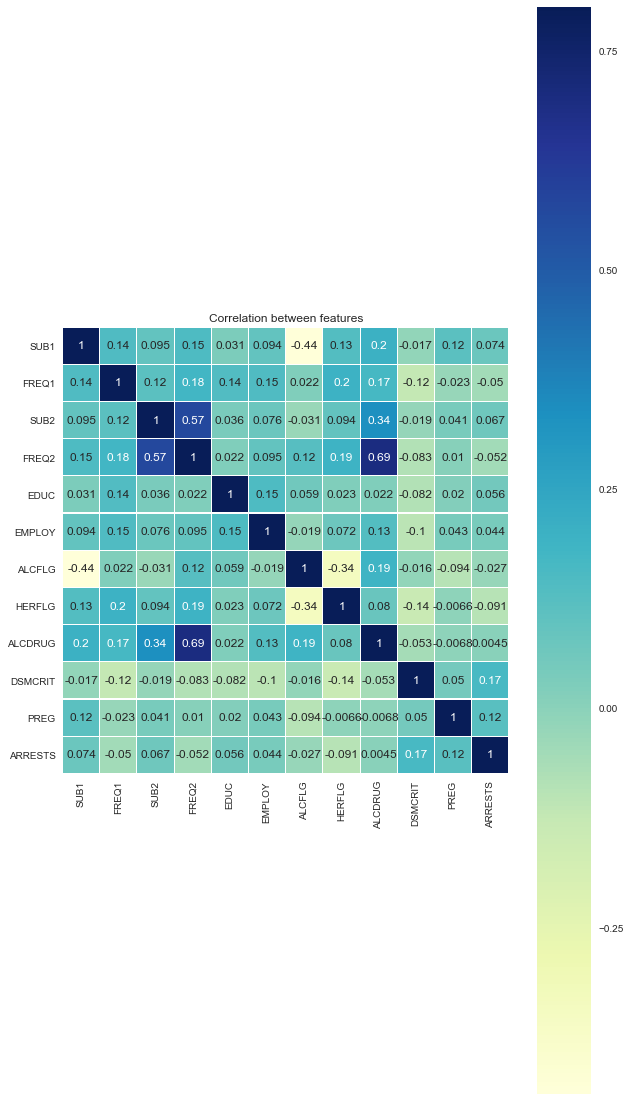

In [4]:
corr=df.loc[:,["SUB1","FREQ1","SUB2","FREQ2","EDUC","EMPLOY","ALCFLG","HERFLG","ALCDRUG","DSMCRIT","PREG","ARRESTS"]].corr()#["Survived"]
plt.figure(figsize=(10, 20))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');
plt.show()

plt.figure()
sns.pairplot(df[['ALCDRUG','FREQ2']], size=6,) #x_vars='ALCDRUG',y_vars='FREQ2' )
plt.show()

In [31]:
df['YEAR'].value_counts()

2011    1936297
2010    1932531
2012    1834624
2013    1762106
2014    1639519
Name: YEAR, dtype: int64

In [ ]:
import matplotlib
matplotlib.style.use('ggplot')


In [161]:
plt.figure()
df5 = df[df['SUB1'].isin([2,5,4,10,7,3])]
df5 = df5[df5['GENDER'].isin([1,2])]

df5 = df5.groupby(['GENDER'])['SUB1'].value_counts().unstack()#.reset_index(name="count")

print (df5.head(12))
plt.title('Number of Substance by Year')

ax = plt.gca() # grab the current axis
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
#ax.set_xticklabels(["12-14","18-20","25-29","35-39","45-49","55 AND OVER"]) 
#plt.show()
# set the labels to display at those ticks

df6 = df5

SUB1         2       3        4        5       7       10
GENDER                                                   
1       2514345  384976  1145850  1040055  441620  316493
2        982983  247611   424175   532561  384412  283270


In [185]:
print df6
df7 = df6.sum(axis=1)
print df7
df8 = df6
for i in [2,5,4,10,7,3]:
    df8[i] = df6[i] / df7
    
df8.rename(columns={2:'ALCOHOL', 5:'HEROIN', 4:'MARIJUANA', 10:'METH', 7:'OPIATES', 3:'COCAINE'},inplace=True)
#df8.rename(index={1:'MALE', 2:'FEMALE'},inplace=True)

#print (df8)


SUB1             ALCOHOL   COCAINE  MARIJUANA    HEROIN   OPIATES      METH
[MALE, FEMALE]                                                             
1               0.430293  0.065883   0.196095  0.177990  0.075577  0.054163
2               0.344301  0.086729   0.148572  0.186535  0.134645  0.099218
[MALE, FEMALE]
1    1.0
2    1.0
dtype: float64


KeyError: 2

In [183]:
#df8.index.rename(['MALE', 'FEMALE'],inplace=True)
#df8 = df8.transpose()
#df8.rename(columns:{1:'MALE', 2:'FEMALE'},inplace=True)

print df8



SUB1             ALCOHOL   COCAINE  MARIJUANA    HEROIN   OPIATES      METH
[MALE, FEMALE]                                                             
1               0.430293  0.065883   0.196095  0.177990  0.075577  0.054163
2               0.344301  0.086729   0.148572  0.186535  0.134645  0.099218


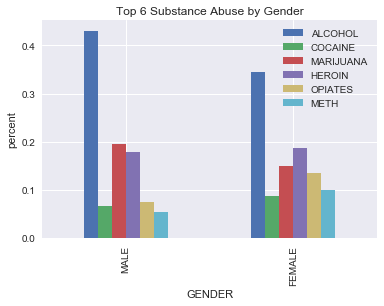

In [184]:
plt.figure()
#df2['sub1_ratio'] = (df2.groupby(['YEAR'])['SUB1'] / df2.groupby(['YEAR']).sum())

ax = df8.plot(kind='bar')
ax.set(xlabel="GENDER", ylabel="percent")
ax.legend(bbox_to_anchor=(1, 1))

#df6.groupby(['YEAR']).plot.bar(x='SUB1', y='count')
#df6.groupby(['YEAR','SUB1'])['SUB1'].sum().plot.bar()

#df6.plot.bar(x='SUB1', y='count')
ax.set_xticklabels(["MALE","FEMALE"]) 
#df6.plot(kind='bar')
#pd.crosstab(df5['YEAR'],df5['SUB1']).plot.bar()
plt.title('Top 6 Substance Abuse by Gender')
plt.show()

In [152]:
#print(df2['YEAR'].value_counts())

#print(df.groupby('SUB1')['SUB1'].value_counts().nlargest(9))

sub1_map = {2:'ALCOHOL', 5:'HEROIN', 4:'MARIJUANA', 10:'METH', 7:'OPIATES', 3:'COCAINE'}
df3 = df[['GENDER','SUB1']]
df3 = df3[df3['SUB1'].isin([2,5,4,10,7,3])]

df3['SUB1'].replace(sub1_map, inplace=True)


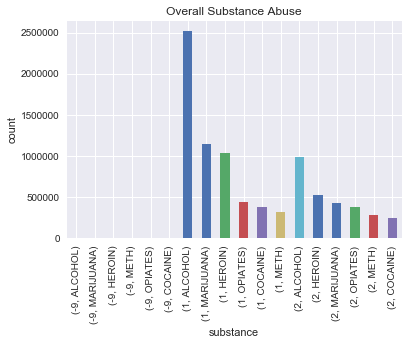

In [153]:
plt.figure()
ax = df3.groupby(['GENDER'])['SUB1'].value_counts().plot.bar()
ax.set(xlabel="substance", ylabel="count")
#ax.legend(bbox_to_anchor=(1, 1))
plt.title('Overall Substance Abuse')

#df3.groupby(['GENDER', 'SUB1']).sum().unstack().plot( kind='bar', stacked=True)
plt.show()

In [186]:
print df.query('STFIPS==39').query('DAYWAIT >= 365')[['DAYWAIT','CASEID']].head(5) #ohio = 39
print df.query('STFIPS==39').query('DAYWAIT >= 900')[['DAYWAIT','CASEID']].head(5)


      DAYWAIT       CASEID
2001      408  20100002002
2117      956  20100002118
2295      844  20100002296
2333      692  20100002334
2369      719  20100002370
      DAYWAIT       CASEID
2117      956  20100002118
4190      924  20100004191
4550      929  20100004551
4939      920  20100004940
5467      974  20100005468
